In [1]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


In [2]:
x_encoded= layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x_encoded)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [3]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))
               # callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/15
469/469 [==============================] - 9s 14ms/step - loss: 0.2173 - val_loss: 0.1472
Epoch 2/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1363 - val_loss: 0.1280
Epoch 3/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1256 - val_loss: 0.1222
Epoch 4/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1201 - val_loss: 0.1171
Epoch 5/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1163 - val_loss: 0.1134
Epoch 6/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1132 - val_loss: 0.1107
Epoch 7/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1108 - val_loss: 0.1087
Epoch 8/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1090 - val_loss: 0.1071
Epoch 9/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1075 - val_loss: 0.1058
Epoch 10/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1063 - val_lo

**Test on K random Images**

In [ ]:
import random
K=random.randint(5,19)
print(K)

10


##**Encoder** **Model**

In [63]:
encoder = keras.Model(input_img, encoded)
encoder.summary()
encoded_imgs = encoder.predict(x_test[K:2*K])

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

##**Decoder** **Model**


In [64]:
decoder=keras.Model(encoded,decoded)
decoded_imgs = decoder.predict(encoded_imgs)
decoder.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        116

## **Autoencoder model**

In [65]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [59]:
autoencoder_img= autoencoder.predict(x_test[K:2*K])

**Test on K random Images**

In [33]:
# k_test=x_test[K:2*K]
# k_decoded_imgs=[]
# k_encoded_imgs=[]
# k_autoencoder_img=[]
# for j in range(K,(2*K)):
#   k_test.append(x_test[j])
#   k_decoded_imgs.append(decoded_imgs[j])
#   k_encoded_imgs.append(encoded_imgs[j])
#   k_autoencoder_img.append(autoencoder_img[j])

In [66]:
k_test=x_test[K:2*K]

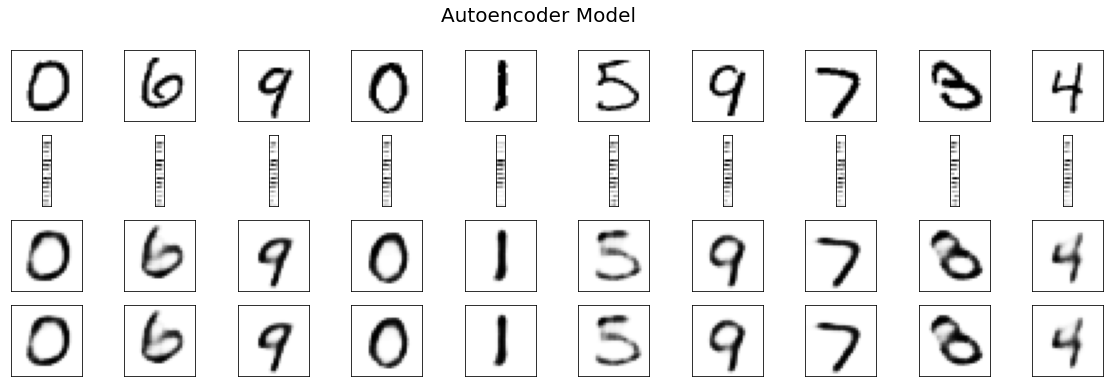

In [67]:

import matplotlib.pyplot as plt
n = len(encoded_imgs)
plt.figure(figsize=(20, 6))
for i in range( n ):
    # Display original
    ax = plt.subplot(4, n, i+1)
    plt.imshow(k_test[i].reshape(28, 28),cmap="binary")
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display encoded
    
    ax = plt.subplot(4, n, i + n+1)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T,cmap="binary")
  
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display decoded
    ax = plt.subplot(4, n, i + n+n+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28),cmap="binary")
   # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display Autoencoder
    ax = plt.subplot(4, n, i + n+n+1)
    plt.imshow(autoencoder_img[i].reshape(28, 28),cmap="binary")
    plt.suptitle('Autoencoder Model', fontsize=20)
   # plt.gray()
   
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

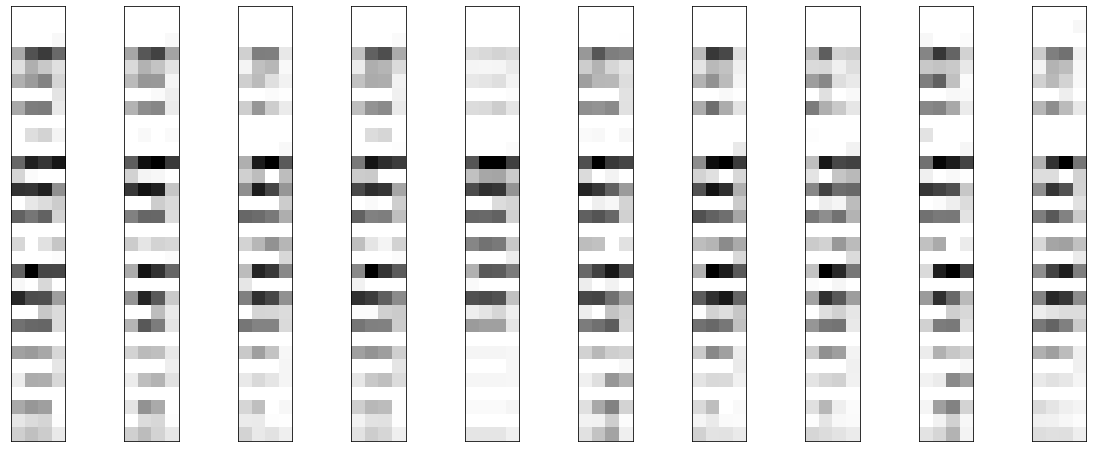

In [48]:



plt.figure(figsize=(20, 8))
for i in range( n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(k_encoded_imgs[i].reshape((4, 4 * 8)).T,cmap="binary")
   
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

